In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
training_images = train_images.astype('float32') / 255
testing_images = test_images.astype('float32') / 255

In [4]:
print("Number of training images in the dataset :", training_images.shape[0])
print("Number of testing images in the dataset :", testing_images.shape[0])

Number of training images in the dataset : 60000
Number of testing images in the dataset : 10000


In [5]:
print(f"Shape of the images in training dataset", training_images[0].shape)

Shape of the images in training dataset (28, 28)


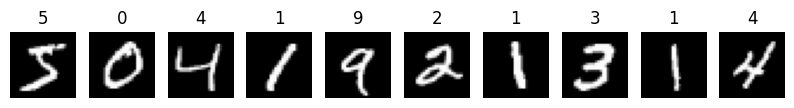

In [7]:
fig, axes= plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
    axes[i].imshow(training_images[i].reshape(28,28), cmap='gray')
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()



In [9]:
model = models.Sequential([
        layers.Flatten(input_shape=(28,28,1)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)

c:\Users\abc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit( training_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.9294 - loss: 0.2371
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9691 - loss: 0.1002
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9775 - loss: 0.0714
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9828 - loss: 0.0532
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9862 - loss: 0.0425


In [11]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


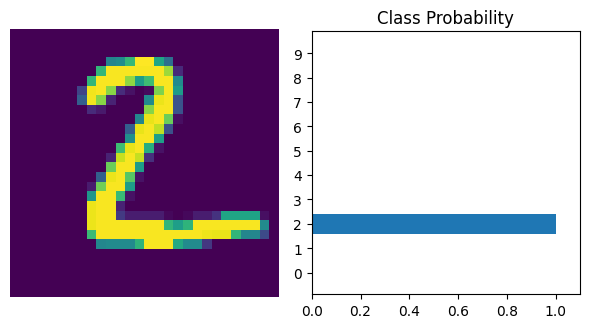

In [16]:
image, label = testing_images[1], test_labels[1]
probabilities = model.predict(image.reshape(1, 28, 28, 1))
view_classify(image, probabilities[0])

In [18]:
test_loss, test_accuracy = model.evaluate(testing_images, test_labels)
print(f'Accuracy of the neural network on the {testing_images.shape[0]} test images: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.9770 - loss: 0.0733
Accuracy of the neural network on the 10000 test images: 97.70%
